# Land mask pickle

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import warnings
warnings.filterwarnings('ignore')
import time

%matplotlib inline

Load general model parameters:

In [3]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 

In [4]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

Landmask map to pickle:

Time for plotting land mask without pickle:  8.975427999999999


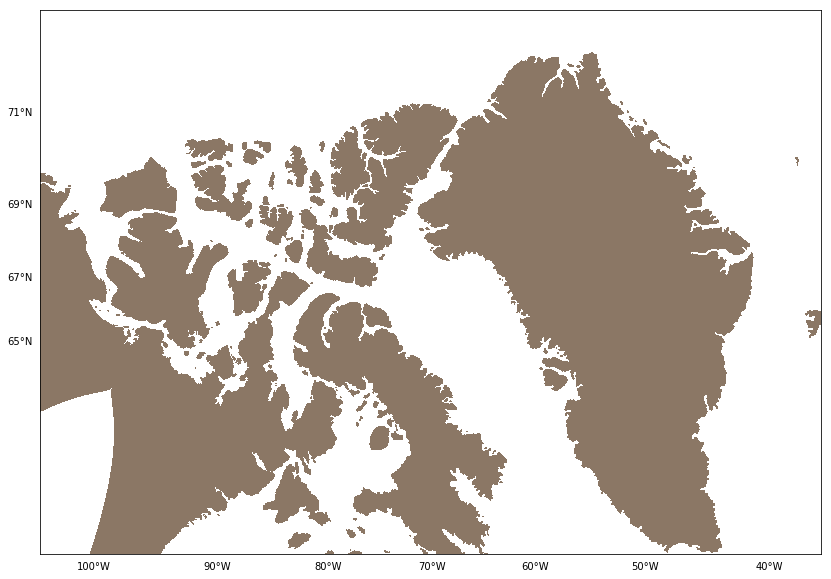

In [5]:
t1 = time.clock()
fig, ax1 = plt.subplots(figsize=(14,10))

# plot 1 ---------------------------
proj1=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -70, resolution='i', width=3.95e6, height=2.75e6, ax=ax1)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)

x_model, y_model = proj1(lon, lat)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

print('Time for plotting land mask without pickle: ', time.clock()-t1)

# pickle the class instance.
pickle.dump(proj1,open('surface-land_mask.pickle','wb'),-1)

Compare with drawlsmask:

Time for plotting land mask with drawlsmask:  6.1750219999999985


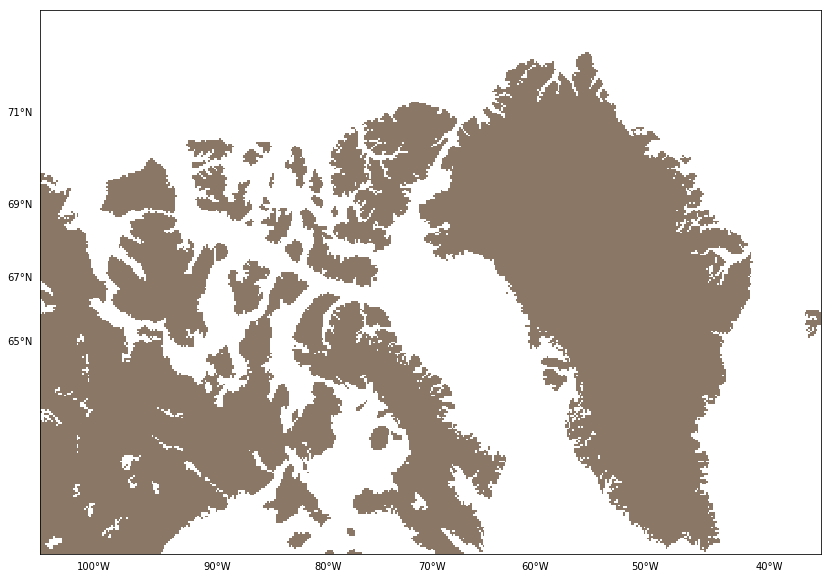

In [19]:
t3 = time.clock()
fig, ax1 = plt.subplots(figsize=(14,10))
proj1=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -70, resolution='i', width=3.95e6, height=2.75e6, ax=ax1)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawlsmask(land_color = "#8b7765", ocean_color="none", zorder=1)

print('Time for plotting land mask with drawlsmask: ', time.clock()-t3)

Test pickle creation:

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


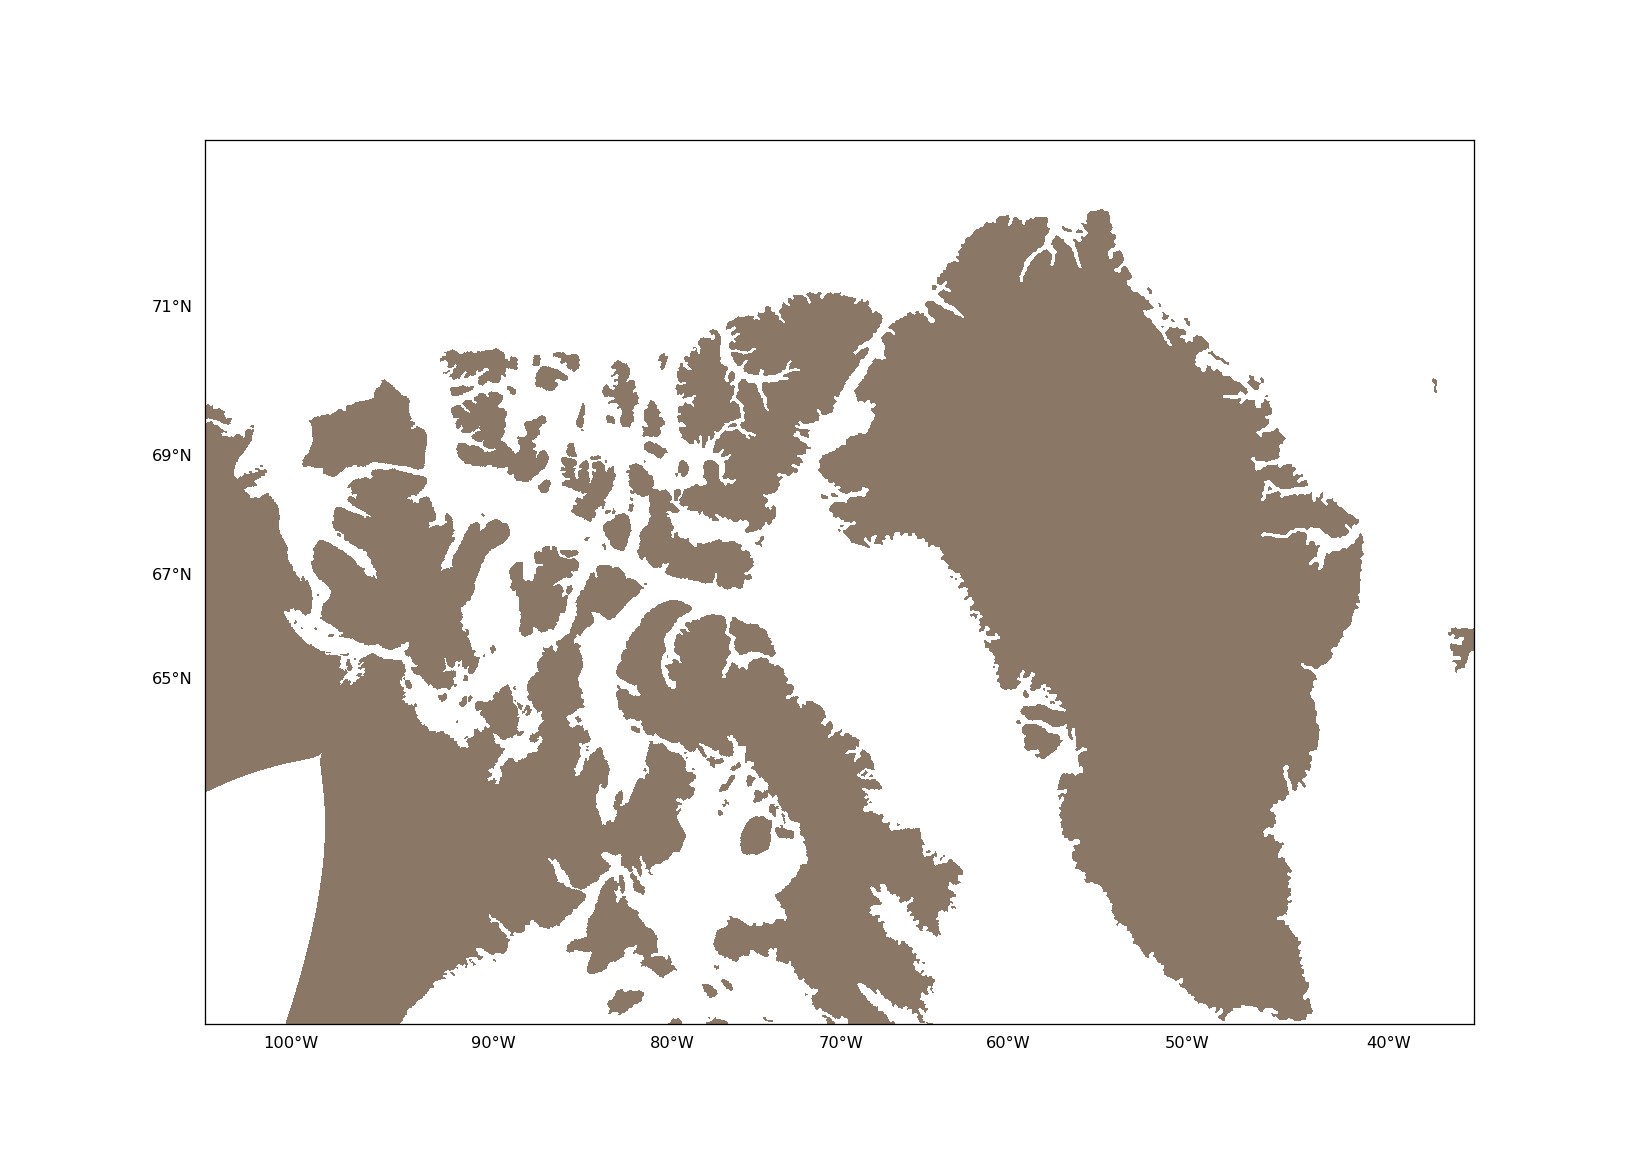

Time for plotting land mask with pickle:  0.06451800000000141


In [11]:
t2 = time.clock()

a = pickle.load(open('surface-land_mask.pickle','rb'))

print('Time for plotting land mask with pickle: ', time.clock()-t2)

Demonstrate some of its use:

<IPython.core.display.Javascript object>


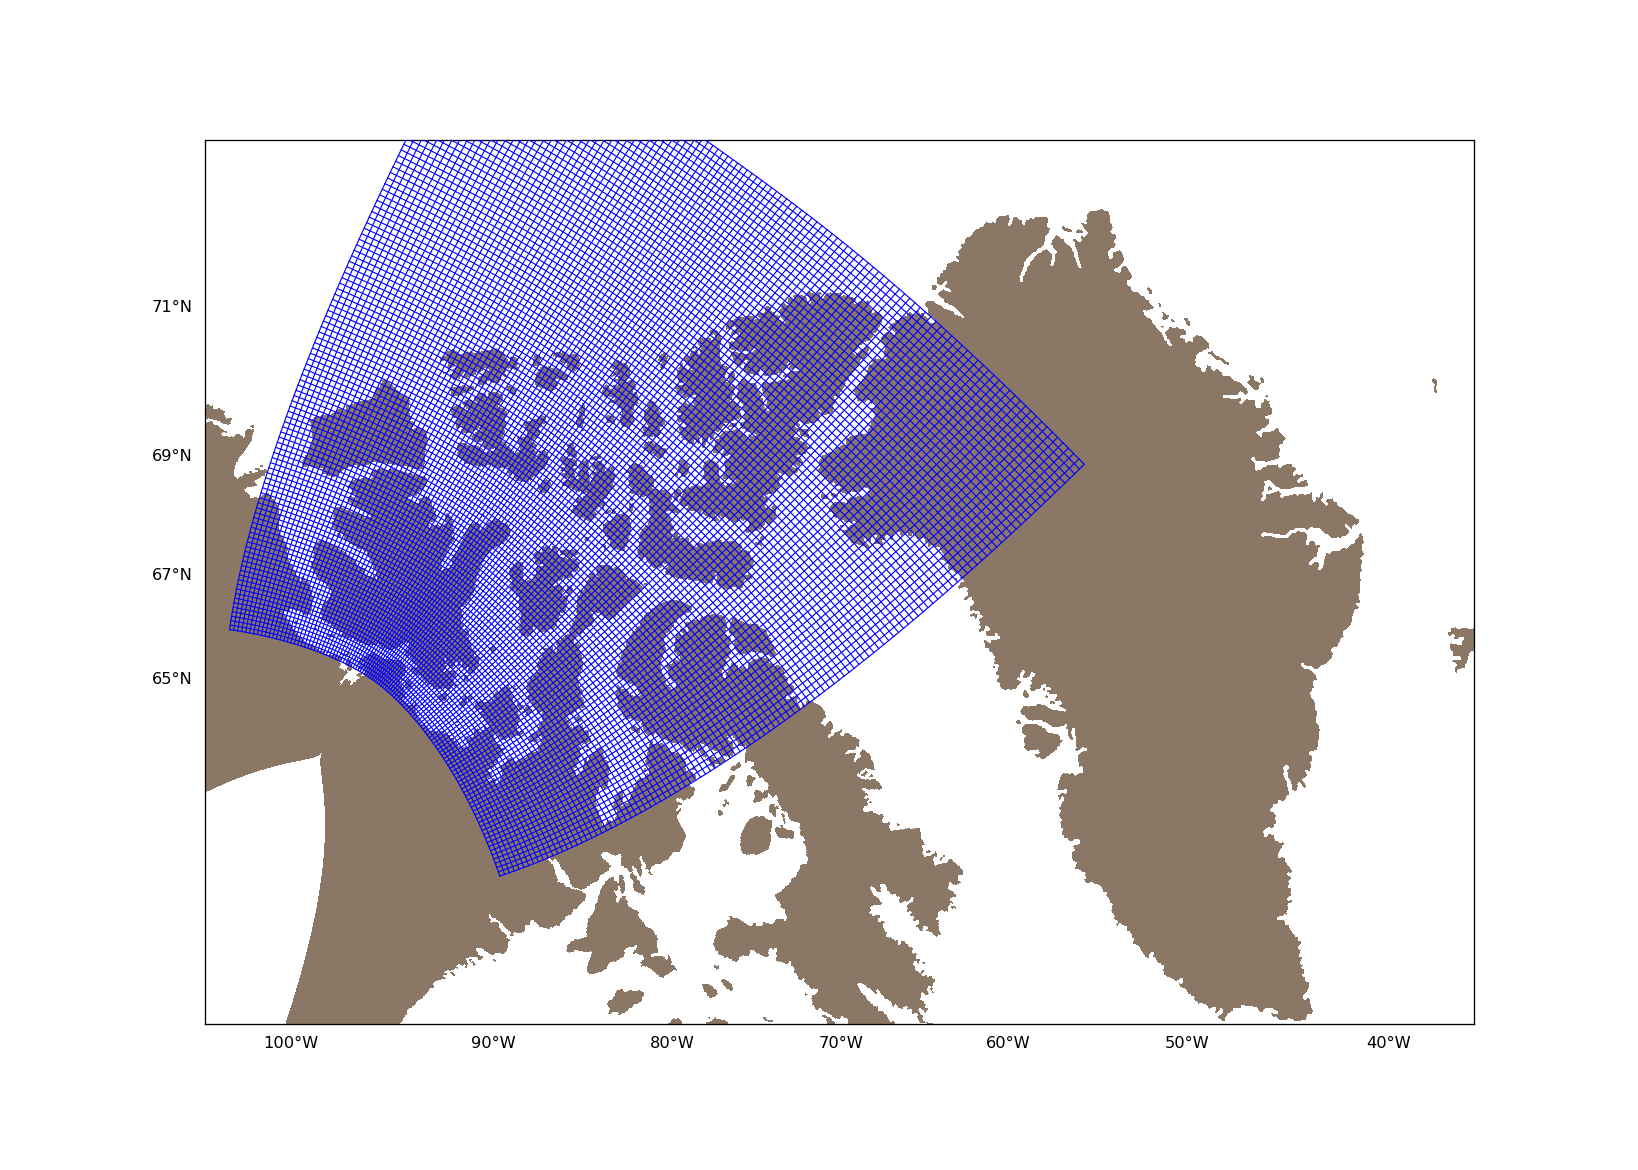

In [29]:
map_bg = pickle.load(open('surface-land_mask.pickle','rb'))

x,y = map_bg(lon,lat)
res = 5
map_bg.plot(x[1480:2050:res,200:799:res], y[1480:2050:res,200:799:res], 'b-', lw=0.7, zorder=3);
map_bg.plot(x[1480:2050:res,200:799:res].T, y[1480:2050:res,200:799:res].T, 'b-', lw=0.7, zorder=3);